### Tools

In [4]:
import numpy as np

In [5]:
import pandas as pd


In [6]:
import os
import nibabel as nib
from nibabel.testing import data_path
import matplotlib.pyplot as plt

In [7]:
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

### 讀取nii檔案

In [111]:
data_path = '/content/drive/MyDrive/Colab Notebooks/image segmentation/ADNI 1'

In [112]:
ADNI_file = os.listdir(data_path)

In [113]:
image=[]

In [114]:
def process_folder(folder_path):
    # 取得資料夾中的所有檔案和子資料夾列表
    items = os.listdir(folder_path)
    for item in items:
        item_path = os.path.join(folder_path, item)
        # 如果是資料夾，則遞迴處理
        if os.path.isdir(item_path):
            process_folder(item_path)
        # 如果是 .nii 檔案，則讀取
        elif item.endswith('.nii'):
            # 使用 nibabel 讀取 .nii 檔案
            img = nib.load(item_path)
            # 在這裡您可以對讀取到的 .nii 檔案進行任何操作
            print("讀取到檔案:", item_path)
            image.append(img)

# 從根目錄開始遞迴處理資料夾
process_folder(data_path)

讀取到檔案: /content/drive/MyDrive/Colab Notebooks/image segmentation/ADNI 1/ADNI/941_S_1363/MPR-R__GradWarp/2007-03-12_12_58_12.0/I63903/ADNI_941_S_1363_MR_MPR-R__GradWarp_Br_20070801203315575_S28009_I63903.nii
讀取到檔案: /content/drive/MyDrive/Colab Notebooks/image segmentation/ADNI 1/ADNI/941_S_1363/MPR__GradWarp__B1_Correction__Mask/2007-03-12_12_46_38.0/I63895/ADNI_941_S_1363_MR_MPR__GradWarp__B1_Correction__Mask_ICS_20070801202821716_S28008_I63895.nii
讀取到檔案: /content/drive/MyDrive/Colab Notebooks/image segmentation/ADNI 1/ADNI/941_S_1363/MPR__GradWarp__B1_Correction/2007-03-12_12_46_38.0/I63898/ADNI_941_S_1363_MR_MPR__GradWarp__B1_Correction_Br_20070801203001155_S28008_I63898.nii
讀取到檔案: /content/drive/MyDrive/Colab Notebooks/image segmentation/ADNI 1/ADNI/941_S_1363/MPR__GradWarp__B1_Correction__N3__Scaled/2007-03-12_12_46_38.0/I63897/ADNI_941_S_1363_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070801202916120_S28008_I63897.nii
讀取到檔案: /content/drive/MyDrive/Colab Notebooks/image segme

### 讀取對應著每個影像資訊的csv檔(label)

In [115]:
csv_path = '/content/drive/MyDrive/Colab Notebooks/image segmentation/Preprocess/ADNI_test.csv'
features = pd.read_csv(csv_path)
features

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I63903,941_S_1363,MCI,F,70,sc,MRI,MPR-R; GradWarp,Processed,3/12/2007,NiFTI,2/10/2024
1,I63896,941_S_1363,MCI,F,70,sc,MRI,MPR; GradWarp; B1 Correction; N3,Processed,3/12/2007,NiFTI,2/10/2024
2,I63898,941_S_1363,MCI,F,70,sc,MRI,MPR; GradWarp; B1 Correction,Processed,3/12/2007,NiFTI,2/10/2024
3,I63900,941_S_1363,MCI,F,70,sc,MRI,MPR-R; GradWarp; B1 Correction; Mask,Processed,3/12/2007,NiFTI,2/10/2024
4,I63902,941_S_1363,MCI,F,70,sc,MRI,MPR-R; GradWarp; B1 Correction,Processed,3/12/2007,NiFTI,2/10/2024
...,...,...,...,...,...,...,...,...,...,...,...,...
137,I45113,002_S_0295,CN,M,85,sc,MRI,MPR-R; GradWarp; B1 Correction,Processed,4/18/2006,NiFTI,12/24/2023
138,I40972,002_S_0295,CN,M,85,m06,MRI,MPR-R; GradWarp; B1 Correction,Processed,11/02/2006,NiFTI,12/24/2023
139,I150176,002_S_0295,CN,M,88,m36,MRI,MPR; GradWarp; B1 Correction; N3,Processed,5/22/2009,NiFTI,12/24/2023
140,I123689,002_S_0295,CN,M,87,m24,MRI,MPR-R; GradWarp; B1 Correction; N3,Processed,7/23/2008,NiFTI,12/24/2023


### 把對應的影像(.nii) 與對應的標籤(AD,CN,MCI)做成一組組tuple

In [116]:
features['Subject']

0      941_S_1363
1      941_S_1363
2      941_S_1363
3      941_S_1363
4      941_S_1363
          ...    
137    002_S_0295
138    002_S_0295
139    002_S_0295
140    002_S_0295
141    002_S_0295
Name: Subject, Length: 142, dtype: object

In [117]:
headers = image[0].header
print(headers['db_name'])

b'941_S_1363'


In [118]:
train_data = []

for img in image:
  for ind , feature in enumerate(features['Subject']):
    x = str(img.header['db_name'].item())
    y = 'b\''+ feature + '\''
    if x == y:
      a = (img , features['Group'][ind])
      train_data.append(a)
      break


In [119]:
len(image) == len(train_data)

True

In [120]:
train_data_label = [train_data[i][1] for i in range(len(train_data))]

In [121]:
train_data_label

['MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN']

### 查看原始影像維度

In [122]:
for i in range(len(image)):
  print(image[i].shape)

(192, 192, 160)
(160, 192, 192)
(192, 192, 160)
(192, 192, 160)
(160, 192, 192)
(192, 192, 160)
(192, 192, 160)
(192, 192, 160)
(192, 192, 160)
(256, 256, 166)
(166, 256, 256)
(256, 256, 166)
(256, 256, 166)
(256, 256, 166)
(256, 256, 166)
(192, 192, 160)
(160, 192, 192)
(160, 192, 192)
(160, 192, 192)
(160, 192, 192)
(192, 192, 160)
(192, 192, 160)
(192, 192, 160)
(192, 192, 160)
(192, 192, 160)
(192, 192, 160)
(160, 192, 192)
(192, 192, 160)
(192, 192, 160)
(192, 192, 160)
(192, 192, 160)
(192, 192, 160)
(192, 192, 160)
(192, 192, 160)
(197, 233, 189)
(192, 192, 160)
(192, 192, 160)
(160, 192, 192)
(160, 192, 192)
(192, 192, 160)
(192, 192, 160)
(192, 192, 160)
(192, 192, 160)
(192, 192, 160)
(192, 192, 160)
(192, 192, 160)
(192, 192, 160)
(160, 192, 192)
(192, 192, 160)
(192, 192, 160)
(160, 192, 192)
(192, 192, 160)
(192, 192, 160)
(192, 192, 160)
(192, 192, 160)
(192, 192, 160)
(192, 192, 160)
(192, 192, 160)
(192, 192, 160)
(160, 192, 192)


In [123]:
len(train_data)

60

In [124]:
type(image[0])

nibabel.nifti1.Nifti1Image

In [125]:
train_data[0][0].affine

array([[ 4.27856772e-08,  3.27053802e-04, -1.20000001e+00,
         8.79423752e+01],
       [-3.27053802e-04, -1.24999991e+00, -3.13971662e-04,
         1.51186447e+02],
       [-1.24999996e+00,  3.27053802e-04,  4.10742518e-08,
         9.69491501e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [126]:
# 顯示 NIfTI 1 範例影像標頭資訊
x = train_data[0][0].header

x.get_zooms()

(1.25, 1.25, 1.2)

In [127]:
image

### 把不清楚的影像刪除

In [128]:
len(image)

60

In [129]:

indices_to_remove = [1,4,10,16,17,18,19,26,37,38,47,50,59  ,2,3,5,6,7,8,9,11,12,13,14,15,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,51,52,53,54,55,56,57,58]  # 要刪除的元素的索引列表

# 刪除指定索引的元素
for index in sorted(indices_to_remove, reverse=True):
    del image[index]
    del train_data_label[index]
    del train_data[index]

print('image len:',len(image))  # 輸出已刪除元素後的列表
print('train_data_label len:',len(train_data_label))
print('train_data len:',len(train_data))


image len: 12
train_data_label len: 12
train_data len: 12


In [130]:
len(image)

12

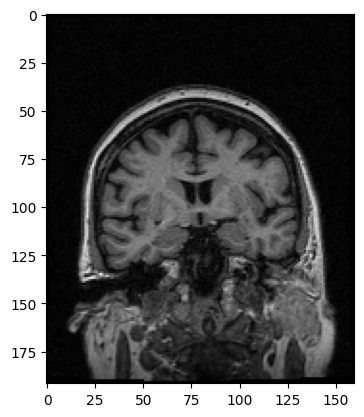

In [140]:
plt.imshow(image[0].dataobj[:,192//2,:],cmap='gray')

plt.show()

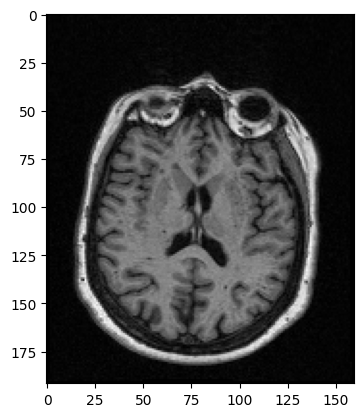

In [138]:
plt.imshow(image[0].dataobj[192//2,:,:],cmap='gray')

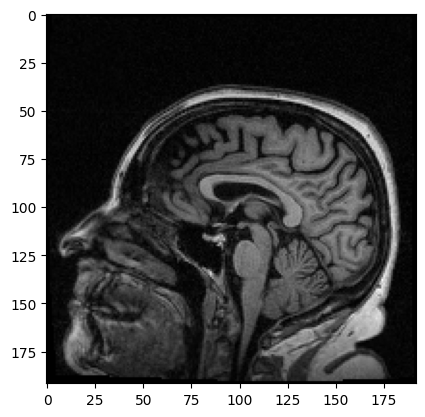

In [139]:
plt.imshow(image[0].dataobj[:,:,160//2],cmap='gray')

### 視覺化影像

In [134]:
from nibabel.viewers import OrthoSlicer3D
for i in range(len(image)):
# 建立 OrthoSlicer3D Viewer 物件
  osViewer = OrthoSlicer3D(image[i].dataobj[:,:,:])

# 設定三軸的切面位置
  osViewer.set_position(192//2, 192//2, 160//2)   #(88,120,128)

  # 顯示三軸切面
  osViewer.show()

Output hidden; open in https://colab.research.google.com to view.

### 對每組nii檔案 把海馬體切出來(每組26片)

KeyboardInterrupt: 

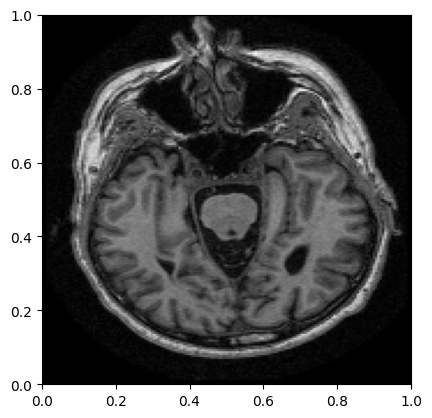

In [135]:
import matplotlib.pyplot as plt
image_file = [[] for i in range(len(image))]

if not os.path.exists('image_folder'):
    os.makedirs('image_folder')
# 繪製多張切面圖
def show_slices(slices):
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")
        axes[i].axis('off')

# 建立各軸切面

for i in range(len(image)):   #每一組nii檔案

  for j in range(20):     #每組海馬體位置的切片
    if image[i].shape[0] == 192:                #維度為(192,192,160)切大概100~125的地方

      slice1 = image[i].dataobj[100+ j , : , :]

      image_file[i].append(slice1)

      slice1_img = plt.imshow(slice1,cmap='gray',extent=[0,1,0,1])
    #plt.show()
    elif image[i].shape[0] == 256:               #維度為(256,256,166)切大概150~175的地方

      slice1 = image[i].dataobj[150+ j , : , :]

      image_file[i].append(slice1)

      slice1_img = plt.imshow(slice1,cmap='gray',extent=[0,1,0,1])


    else:
      slice1 = image[i].dataobj[100+ j , : , :]

      image_file[i].append(slice1)

      slice1_img = plt.imshow(slice1,cmap='gray',extent=[0,1,0,1])








### 裁減黑色邊緣，只留頭部

In [ ]:

# 尋找非黑色像素值的範圍
crop_img=[[] for i in range(len(image_file))]
for ind,img in enumerate(image_file):
  for slide in img:
    non_black_rows = np.where(~np.all(slide <= 185.0, axis=1))[0]
    non_black_cols = np.where(~np.all(slide <= 185.0, axis=0))[0]
    #print(non_white_rows,non_white_cols)
    # 確定裁剪的邊界
    top_row = non_black_rows.min()
    bottom_row = non_black_rows.max()
    left_col = non_black_cols.min()
    right_col = non_black_cols.max()
    #print(top_row,bottom_row,left_col,right_col)

    # 裁剪影像
    cropped_image = slide[top_row + 20:bottom_row+1, left_col:right_col+1]    #+20是把眼睛鼻子切掉
    crop_img[ind].append(cropped_image)



In [ ]:
for i in range(10):
  if len(crop_img[i]) ==0:
    print(i)

In [ ]:
for i in range(10):
  plt.imshow(crop_img[i][0],cmap='gray',extent=[0,1,0,1])
  plt.show()

In [ ]:
crop_img

### 把裁切好的切面存成.jpg

In [ ]:
if not os.path.exists('image_folder'):
    os.makedirs('image_folder')

In [ ]:

for ind ,data in enumerate(crop_img):
  for slideind ,slide in enumerate(data):
    plt.imshow(slide,cmap='gray',extent=[0,1,0,1])

    plt.axis('off')
    plt.savefig('image_folder/slide{}_{}.jpg'.format(ind,slideind))
    #plt.show()


### read .jpg

In [ ]:
cropped_images=[[] for i in range(len(crop_img))]
for ind in range(len(crop_img)):
  for slideind in range(len(crop_img[ind])):
    path = '/content/image_folder/slide{}_{}.jpg'.format(ind,slideind)
    a = plt.imread(path)
    #plt.imshow(a,cmap='gray')
    plt.axis('off')
    # 尋找非白色像素值的範圍
    non_white_rows = np.where(~np.all(a >= 200, axis=1))[0]
    non_white_cols = np.where(~np.all(a >= 200, axis=0))[0]

    # 確定裁剪的邊界
    top_row = non_white_rows.min()
    bottom_row = non_white_rows.max()
    left_col = non_white_cols.min()
    right_col = non_white_cols.max()

    # 裁剪影像
    cropped_image = a[top_row:bottom_row+1, left_col:right_col+1]
    cropped_images[ind].append(cropped_image)

    plt.imshow(cropped_image,cmap='gray')
    #plt.show()


In [ ]:
len(cropped_images[3])

### resize same dimension

In [ ]:
resize_image=[[] for i in range(len(cropped_images))]
for ind , img in enumerate(cropped_images):
  for slide in img:
    image = cv2.resize(slide,(256,256))
    resize_image[ind].append(image)


In [ ]:
for img in resize_image:
  for slide in img:
    #print(img.shape)
    plt.imshow(slide,extent=[0,1,0,1])

    # 在圖像中標記一塊區域
    x_point = [0.2 ,0.8 ,0.8 ,0.2 ,0.2]
    y_point = [0.2 ,0.2 ,0.7 ,0.7, 0.2]
    plt.plot(x_point, y_point, color='red', label='Point')
    #plt.show()

### 裁減掉腦室以外的區塊

In [ ]:
slide1_ventricles=[[] for i in range(len(resize_image))]
for ind , img in enumerate(resize_image):
  for slide in img:

    height, width = slide.shape[:2]


    x_pixels = np.array([0.2 ,0.8 ,0.8 ,0.2 ,0.2]) * width
    y_pixels = np.array([0.2 ,0.2 ,0.7 ,0.7, 0.2]) * height

    # 计算裁剪区域的最小矩形边界
    x_min, x_max = np.min(x_pixels), np.max(x_pixels)
    y_min, y_max = np.min(y_pixels), np.max(y_pixels)

    # 由于图像坐标系（0,0）在左上角，而matplotlib的（0,0）在左下角，可能需要调整y坐标
    y_min, y_max = height - y_max, height - y_min

    # 裁剪图像
    cropped_img = slide[int(y_min):int(y_max), int(x_min):int(x_max)]
    slide1_ventricles[ind].append(cropped_img)

    # 展示裁剪后的图像
    plt.imshow(cropped_img)
    plt.axis('off')
    #plt.show()


### 重新resize腦室維度

In [ ]:
slide1_ventricles[0][0].shape

In [ ]:
slide1_ventricles_resize=[[] for i in range(len(slide1_ventricles))]
for ind ,img in enumerate(slide1_ventricles):
  for slide in img:
    image = cv2.resize(slide,(128,128))
    slide1_ventricles_resize[ind].append(image)
    plt.imshow(image)
    plt.axis('off')
    #plt.show()


### Final

In [ ]:
len(slide1_ventricles_resize)

### 加上label

In [ ]:
train_data_label

In [ ]:
len(train_data_label) == len(slide1_ventricles_resize)

In [ ]:
dataset = [[slide1_ventricles_resize[i] , train_data[i][1]] for i in range(len(train_data_label))]

In [ ]:
len(dataset)

### 儲存最終圖片

In [ ]:
#刪除目錄上有內容物的資料夾程式碼，目的:當資料有誤要重新執行時
'''
import shutil

# 指定要刪除有內容物的目錄路徑
directory_path = '/content/slide1_ventricle'

try:
    shutil.rmtree(directory_path)
    print(f"The directory '{directory_path}' and all its contents have been removed")
except Exception as error:
    print(f"Error: {error}. Failed to remove '{directory_path}' and its contents")

'''


In [ ]:
'''
if not os.path.exists('slide1_ventricle'):
    os.makedirs('slide1_ventricle')
'''

In [ ]:
#len(slide1_ventricles_resize)

In [ ]:
'''
for ind,img in enumerate(slide1_ventricles_resize):
  plt.imshow(img)
  plt.axis('off')
  plt.savefig('slide1_ventricle/slide1_{}.jpg'.format(ind))
'''

### image normalization to slide1